In [250]:
import numpy as np
import pandas as pd
from sklearn import cross_validation,linear_model,feature_selection
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

### ***********GOAL*****************
- Generate a data set with p = 20 features and n = 1000 observations and generate a response variable with a linear combination of X.
- Perform feature selection using Regression on this simulated data set and comment on the Test set errors

In [251]:

# Temp list to hold the variables
temp_list = []
for i in range(0,1000):
    X_i = np.random.normal(i,100,20) + np.random.normal(i,np.sqrt(i+25),20)  # This will generate a random distribution starting from i to 100 for 20 variables
    temp_list.append(X_i)

df = pd.DataFrame(temp_list)


In [252]:
# checking the columns
df.columns

RangeIndex(start=0, stop=20, step=1)

In [253]:
# The loop below will change the column names from integer to strings
for i in range(0,len(df.columns)):
    col_name = 'X' + '_' + str(i)
    df.rename(index = int , columns = {i:col_name },inplace = True)

In [254]:
df.head()

,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,X_16,X_17,X_18,X_19
0,-1.573141,37.800487,24.284765,-62.258015,-30.813749,-9.451672,-22.408814,-167.179277,84.297549,-91.214368,-1.423438,29.934926,-122.734747,-12.570118,-86.554117,-168.170289,13.812363,116.392932,-108.794152,76.882229
1,-116.416357,66.685686,-7.902445,111.732693,-26.196239,137.929398,46.949552,-155.410135,103.493574,-43.616281,-27.075271,-6.458937,-54.417675,31.877286,-137.446997,-59.803448,12.932133,-71.119456,168.981319,-95.303283
2,11.229891,63.513559,37.238682,171.552746,58.640801,-67.974151,21.626773,-12.744584,2.672648,-3.160185,-61.806850,-34.395588,142.438060,93.794864,-184.231713,83.503229,51.141089,-324.322333,-85.149829,-86.529265
3,154.451212,67.237375,-4.857456,-187.194858,27.231406,-12.587307,58.944552,-72.527316,49.374206,5.054783,-7.129884,-189.354494,-67.414963,11.099785,-136.673630,-216.679053,-140.104265,-29.503206,-141.536250,-89.187592
4,65.909394,21.405852,95.187935,-4.038839,-77.358907,185.688893,-189.004432,21.986838,51.864711,-156.974289,-107.799311,-22.290050,185.628153,-42.530138,-104.515574,88.160049,-117.394188,-240.925606,-27.246510,-50.402748


In [278]:
# Selecting  beats from a random normal distribution and making a few of them 0
betas = np.random.normal(-1,1,20)
betas[7] = 0
betas[10] = 0
betas[15] = 0 
betas[4] = 0 



In [279]:
# Creating a response variable
# epsilon represents a noise vector that is normally distributed between 0 and 1
y = 0
epsilon = np.random.normal(0,1,1000)

for i in range(0,len(df.columns)):
    matrix = df[[df.columns[i]]].as_matrix()
    y = y + epsilon[i] + betas[i]*matrix
    

df_y = pd.DataFrame(data = y,index = np.arange(0,1000)) # This would convert y to a data frame
df_y.rename(int,columns={0:'Y'},inplace=True) # renaming the default column name to Y
df_new = pd.concat([df,df_y],axis=1) # COncatenating the Data Frames to get the final Data Set

In [280]:
# Y follows a pattern and hence intriducing randomness in the data
df_new.Y = df_new.Y.sample(frac=1)

df_new.Y=df_new.Y+np.random.normal(1,5000,1000)

In [281]:
# Train_Test Split
X = df_new.drop(['Y'],axis =1)
y = df_new.Y

train_X,test_X,train_y,test_y = cross_validation.train_test_split(X,y,test_size=.2,random_state=0)

,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,X_16,X_17,X_18,X_19
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [315]:

from sklearn import feature_selection
from sklearn.feature_selection import f_regression
df_eval = pd.DataFrame({'K':np.nan,'features':np.nan,'train_score':np.nan,'cv_score':np.nan},index = [0])
# This Data Frame would hold the values of estimated coefficients
df_beta_hat = pd.DataFrame(columns=X.columns,index=[0])

for i in range(0,len(X.columns)):
    feature_list = []
    k_best = feature_selection.SelectKBest(score_func= f_regression , k = i+1).fit(train_X,train_y)
    indices = k_best.get_support(indices = True) # this return the indices of the features selected
#     print indices
    # The loop below will append the list with the column selected
    
    for j in range(0,i+1):
        feature_list.append(train_X.columns[indices[j]])
        feature_list.append(',')
        
    train_X_new = k_best.fit_transform(train_X,train_y) # Train_X_new is the new sel of features based on the result of select KBest
    estimator = linear_model.LinearRegression().fit(train_X_new,train_y)
    
    #The for loop below would populate a Data frame with the estimated coefficient values
    for l in range(0,len(indices)):
#         print indices[l],X.columns[indices[l]],estimator.coef_[l]
        df_beta_hat.loc[i,X.columns[indices[l]]] = estimator.coef_[l]
    
    #print estimator.coef_
    train_score = estimator.score(train_X_new,train_y)
    cv_score = cross_validation.cross_val_score(estimator,train_X_new,train_y,cv=10).mean()
    
    #populating the result in a DataFrame for Evaluation
    df_eval.loc[i,'train_score'] = train_score
    df_eval.loc[i,'cv_score'] = cv_score
    df_eval.loc[i,'K'] = i+1
    df_eval.loc[i,'features'] = " ".join(str(x) for x in feature_list)
    
    
    

In [320]:
# THe Dataframe has a number of NAN values,replacing it with Zeros
# for i in range(0,len(df_beta_hat.columns)):
df_beta_hat.replace(to_replace=np.NaN,value=0,inplace=True)

In [334]:
for i in range(0,len(df_beta_hat)):
    diff = 0
    for j in range(0,len(betas)):
        
        diff += (df_beta_hat.ix[i][j]-betas[j])**2
    df_beta_hat.loc[i,'beta_del'] = np.sqrt(diff)
        
        

In [335]:
df_beta_hat

,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,...,X_11,X_12,X_13,X_14,X_15,X_16,X_17,X_18,X_19,beta_del
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-12.396534,0.000000,0.000000,0.000000,0.000000,0.000000,11.305555
1,0.000000,0.000000,0.000000,0.000000,0.000000,-4.953887,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-7.682992,0.000000,0.000000,0.000000,0.000000,0.000000,7.629771
2,0.000000,0.000000,0.000000,0.000000,0.000000,-3.232145,0.000000,0.000000,0.000000,0.000000,...,0.000000,-3.253692,0.000000,-6.206702,0.000000,0.000000,0.000000,0.000000,0.000000,6.576262
3,0.000000,0.000000,0.000000,0.000000,0.000000,-2.484868,0.000000,0.000000,0.000000,-2.212275,...,0.000000,-2.589812,0.000000,-5.447031,0.000000,0.000000,0.000000,0.000000,0.000000,5.320553
4,0.000000,0.000000,0.000000,0.000000,0.000000,-2.023500,0.000000,0.000000,0.000000,-1.847048,...,0.000000,-2.297791,0.000000,-5.006101,0.000000,-1.575232,0.000000,0.000000,0.000000,5.175171
5,0.000000,0.000000,0.000000,0.000000,0.000000,-1.929580,0.000000,0.000000,0.000000,-1.750096,...,-0.510986,-2.207825,0.000000,-4.916111,0.000000,-1.444802,0.000000,0.000000,0.000000,4.976089
6,0.000000,0.000000,0.000000,0.000000,0.000000,-1.908919,0.000000,0.000000,0.000000,-1.732863,...,-0.494469,-2.197488,-0.089663,-4.903814,0.000000,-1.432464,0.000000,0.000000,0.000000,4.936557
7,0.000000,0.000000,0.000000,0.726033,0.000000,-1.991092,0.000000,0.000000,0.000000,-1.811466,...,-0.606597,-2.306279,-0.216174,-5.039853,0.000000,-1.508201,0.000000,0.000000,0.000000,5.075137
8,0.564970,0.000000,0.000000,0.679060,0.000000,-2.061010,0.000000,0.000000,0.000000,-1.867209,...,-0.688622,-2.372741,-0.288094,-5.103871,0.000000,-1.611115,0.000000,0.000000,0.000000,5.133087
9,0.444846,0.000000,0.000000,0.507415,0.000000,-2.206979,1.214297,0.000000,0.000000,-1.915464,...,-0.870977,-2.492346,-0.421618,-5.225201,0.000000,-1.772106,0.000000,0.000000,0.000000,5.595103


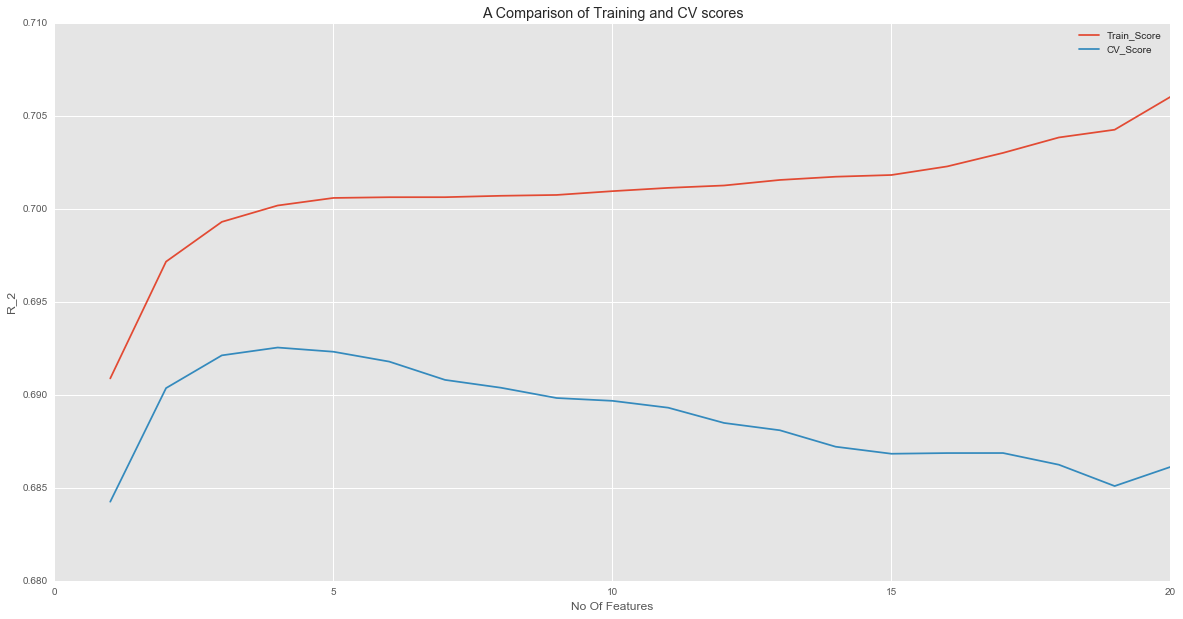

In [295]:
plt.figure(figsize=(20,10))
plt.plot(df_eval.K,df_eval.train_score,label='Train_Score')
plt.plot(df_eval.K,df_eval.cv_score,label='CV_Score')
plt.scatter(x = df_beta_hat.index,y=)
plt.xlabel('No Of Features')
plt.ylabel('R_2')
plt.legend(loc='best')
plt.title('A Comparison of Training and CV scores')

### Observation:
- Maximum R_2,on CV set, is reached when K(no of features = 6.
- The selected features are (X_0 , X_1 , X_6 , X_16 , X_18 , X_19 )
- The values for the coefficients are beta_0=.45,beta_1=-.43,beta_6=-.81,beta_16=.20,beta_18=-.20,beta_19=-.22
- Even though the coefficients are selected from a Random distribution , the features selected are always the same.

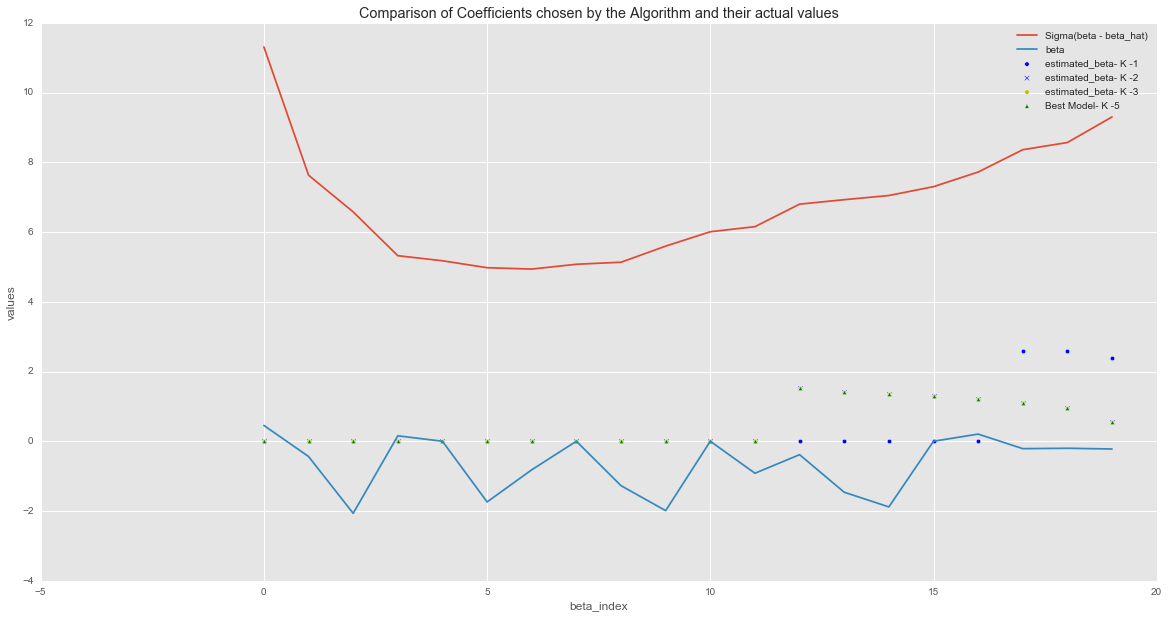

In [353]:
plt.figure(figsize=(20,10))
plt.plot(df_beta_hat.index,df_beta_hat.beta_del,label='Sigma(beta - beta_hat)')
plt.plot(df_beta_hat.index,betas,label='beta')
plt.xlabel('beta_index')
plt.ylabel('values')
plt.scatter(x = df_beta_hat.index,y=df_beta_hat.X_1,label='estimated_beta- K -1')
plt.scatter(x = df_beta_hat.index,y=df_beta_hat.X_2,c='b',marker='x',label='estimated_beta- K -2')
plt.scatter(x = df_beta_hat.index,y=df_beta_hat.X_2,c='y',marker='o',label='estimated_beta- K -3')

plt.scatter(x = df_beta_hat.index,y=df_beta_hat.X_2,c='g',marker='^',label='Best Model- K -5')

plt.title('Comparison of Coefficients chosen by the Algorithm and their actual values')
plt.legend(loc='best')
